<a href="https://colab.research.google.com/github/MoffatKirui/ipweek9/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_Moffat_Kirui_K_Nearest_Neighbours_(KNN)__Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict whether a passenger survived or not using details collected on the titanic.

### b) Defining the Metric for Success

> Build an optimized k-Nearest Neighbor model that performs the above task.

### c) Understanding the context 

* PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
* Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
* Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
* Name. Name of the passenger. We need to parse before using it.
* Sex. Gender Categorical variable that should be encoded. We can use dummy -variable to encode it.
* Age. Age in years.
* SibSp. Siblings / Spouses aboard the Titanic.
* Parch. Parents / Children aboard the Titanic.
* Ticket. Ticket number. Big mess.
* Fare. Passenger fare.
* Cabin. Cabin number.
* Embarked. Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton. Categorical feature that should be encoded. We can use feature mapping or make dummy vairables for it.

### d) Recording the Experimental Design

* Read and explore the given dataset.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Try the easy solution first
* Challenge your solution
* Follow up questions


### e) Data Relevance

The dataset contains relevant information about the passengers of the titanic including whether they survived or not thus can be used to perform our modelling.

## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
# ---
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

titanic = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')



## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
#
titanic.shape

(891, 12)

In [3]:
# Previewing the top of our dataset
#
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Previewing the bottom of our dataset
# 
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Checking whether each column has an appropriate datatype
#
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

In [6]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Description of the data looks okay. The dataset can also be found in the following kaggle [link](https://www.kaggle.com/hesh97/titanicdataset-traincsv)

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fare')

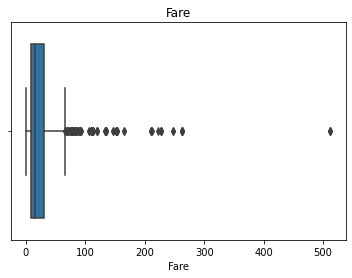

In [7]:
# Checking for Outliers
#
sb.boxplot(titanic['Fare'])
plt.title('Fare')

the most conspicuous outlier was at the 500 mark but it matches records found online on the titanic so we will not drop it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age')

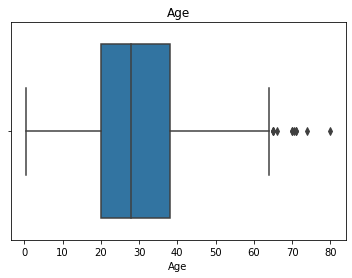

In [8]:
sb.boxplot(titanic['Age'])
plt.title('Age')

there was no outlier in the ages that defies common knowledge .

In [9]:
# Identifying the Missing Data
#
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Dealing with the Missing Data
#
# dropping the cabin column as most of its records are missing
titanic.drop('Cabin',axis=1,inplace=True)
#filling the age with the median
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
#filling the embarked column with the mode as it is a categorical variable
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [11]:
# More data cleaning procedures
#
#dropping columns that we will not be using in our analysis
titanic=titanic.drop(['Name','Ticket','PassengerId'],1)

In [12]:
#label encoding emarked and sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Embarked']= le.fit_transform(titanic['Embarked'])
titanic['Sex']=le.fit_transform(titanic['Sex'])

## 6. Exploratory Analysis

In [13]:
# Ploting the bivariate summaries and recording our observations
#
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Frequency table

In [14]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

more people were in third class as it was the most affordable

In [15]:
titanic['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [16]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

* more people survived in first class than those who died
* in second class the number was approximately the same
* those who died in third class was almost three times those who survived

In [17]:
titanic.groupby('Sex')['Survived'].value_counts()

Sex  Survived
0    1           233
     0            81
1    0           468
     1           109
Name: Survived, dtype: int64

more females survived than males despite the number of males on board being higher. this could be attributed to the fact that women and children were prioritized on the life boats.

Bar Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


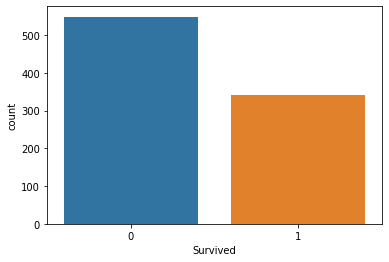

In [18]:
sb.countplot(titanic['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


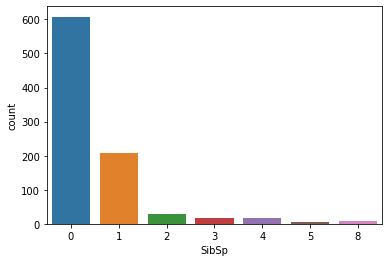

In [19]:
sb.countplot(titanic['SibSp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


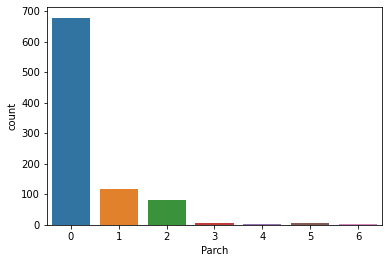

In [20]:
sb.countplot(titanic['Parch'])

Histogram

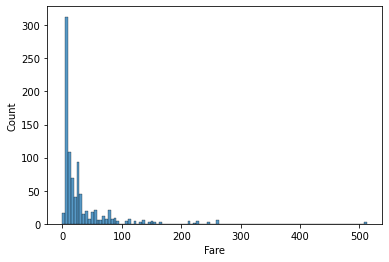

In [21]:
sb.histplot(titanic['Fare'])

In [22]:
# Skewness
skew = titanic['Fare'].skew()
print("The skewness for the Fare is: ", skew)
if skew == 0:
  print("The distribution is symmetrical")
elif skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the Fare is:  4.787316519674893
The distribution is positively skewed




In [23]:
kurt = titanic['Fare'].kurt()
print("The kurtosis for the Fare  is: ", kurt)
if kurt > 0:
  print("Leptokurtic")
elif kurt < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 
 

The kurtosis for the Fare  is:  33.39814088089868
Leptokurtic




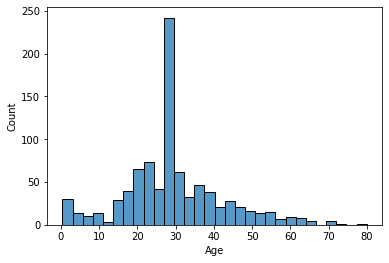

In [24]:
sb.histplot(titanic['Age'])

the ages have a gaussian distribution which  agrees with our expectation

In [25]:
skew = titanic['Age'].skew()
print("The skewness for the Age is: ", skew)
if skew == 0:
  print("The distribution is symmetrical")
elif skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the Age is:  0.5102446555756495
The distribution is positively skewed




In [26]:
titanic['Age'].kurt()

0.9938710163801736

the skew and the kurtosis of the ages can confirm the normality of the distribution from the histogram as it is near 0.

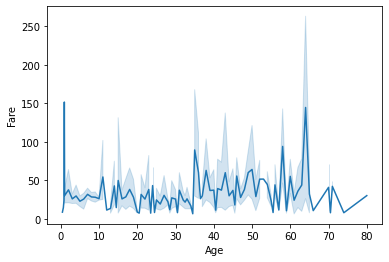

In [27]:
sb.lineplot(data=titanic,x='Age',y='Fare')

there is no significant correlation between the fare and age

Correlation

          Survived    Pclass       Sex  ...     Parch      Fare  Embarked
Survived  1.000000 -0.338481 -0.543351  ...  0.081629  0.257307 -0.167675
Pclass   -0.338481  1.000000  0.131900  ...  0.018443 -0.549500  0.162098
Sex      -0.543351  0.131900  1.000000  ... -0.245489 -0.182333  0.108262
Age      -0.064910 -0.339898  0.081163  ... -0.172482  0.096688 -0.018754
SibSp    -0.035322  0.083081 -0.114631  ...  0.414838  0.159651  0.068230
Parch     0.081629  0.018443 -0.245489  ...  1.000000  0.216225  0.039798
Fare      0.257307 -0.549500 -0.182333  ...  0.216225  1.000000 -0.224719
Embarked -0.167675  0.162098  0.108262  ...  0.039798 -0.224719  1.000000

[8 rows x 8 columns]


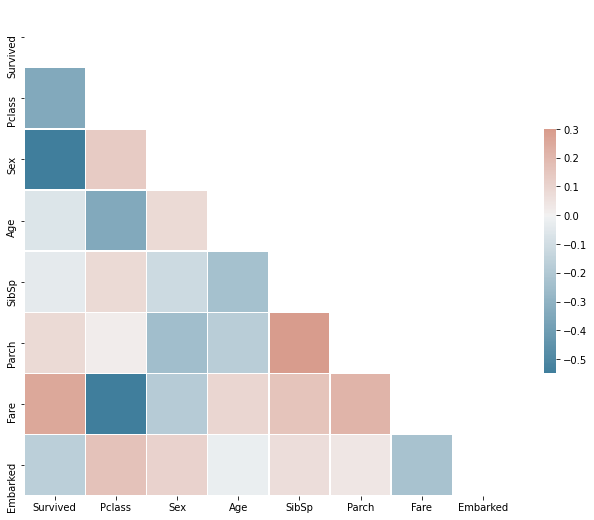

In [28]:
# Compute the correlation matrix
corr = titanic.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* there is a high correlation between class and fare which is expected since first class is more expensive followed by second class then third class.
* there is also a high correlation between sex and survived 

## 7. Implementing the Solution

In [29]:
# Implementing the Solution
# 
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = titanic.drop('Survived',1)
y = titanic['Survived']

In [30]:
# Train Test Split 1 - 80-20

# 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20,random_state=2)

In [31]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

In [32]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
# The final step is to make predictions on our test data
# ---
# 
y1_pred = classifier.predict(X1_test)

In [34]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[91  9]
 [31 48]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.61      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179



In [35]:
# Train Test Split 2- 70-30

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3,random_state=5)
scaler.fit(X2_train)

X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [36]:
#training
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
#prediction
y2_pred = classifier.predict(X2_test)

In [38]:
#evaluating model
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[150  17]
 [ 28  73]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       167
           1       0.81      0.72      0.76       101

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [39]:
# Train Test Split 2- 60-40

X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4,random_state=6)
scaler.fit(X3_train)

X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

In [40]:
#training
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
#prediction
y3_pred = classifier.predict(X3_test)

In [42]:
#evaluating model
print(confusion_matrix(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))

[[195  30]
 [ 45  87]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       225
           1       0.74      0.66      0.70       132

    accuracy                           0.79       357
   macro avg       0.78      0.76      0.77       357
weighted avg       0.79      0.79      0.79       357



using a test size of 0.3 seemed seemed to have produced the best performance amongst the three.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [43]:
# Reviewing the Solution 
#
# Train Test Split 4- we shall stratify the split according to the dependent variable

X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.3,random_state=9,stratify=y)

#perform feature scaling
scaler.fit(X4_train)

X4_train = scaler.transform(X4_train)
X4_test = scaler.transform(X4_test)

In [44]:
# use gridsearch to perform crossvalidation on the model to try to optimize the model parameters
from sklearn.model_selection import GridSearchCV
parameters ={'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance','uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev'],'leaf_size':[10,20,30,40,50],'p':[1,2,3,4,5]}
model=KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X4_train, y4_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 83.16 %
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [45]:
clf=KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric= 'minkowski', n_neighbors= 3, p= 1, weights= 'uniform')
clf.fit(X4_train,y4_train)
#prediction
y4_pred = classifier.predict(X4_test)
#evaluating model
print(confusion_matrix(y4_test, y4_pred))
print(classification_report(y4_test, y4_pred))

[[146  19]
 [ 30  73]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       165
           1       0.79      0.71      0.75       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



the model could be improved by:
* performing dimensionality reduction
* increasing the number of observations used to train and test it.


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

yes, we have the right data

### b). Do we need other data to answer our question?

no...perhaps increasing the size of the dataset to ensure the model can generalize better

### c). Did we have the right question?

yes.